In [36]:
#%matplotlib qt

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from knn import KNN
from sklearn import metrics

In [62]:
nemo = cv2.imread("nemo.jpg")
nemo = cv2.resize(nemo, (0,0), fx=0.25, fy=0.25)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

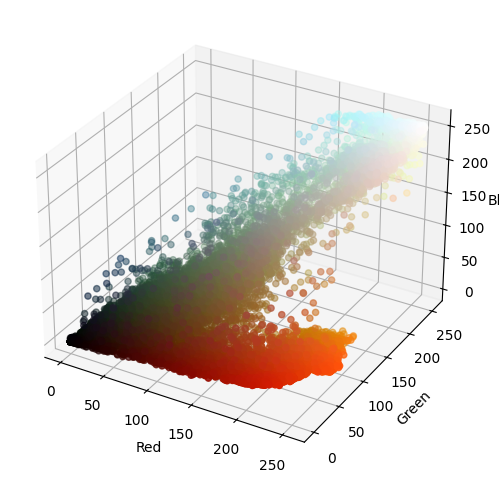

In [63]:
pixels_list_rgb = nemo.reshape(-1,3)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection= '3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb/ 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [64]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

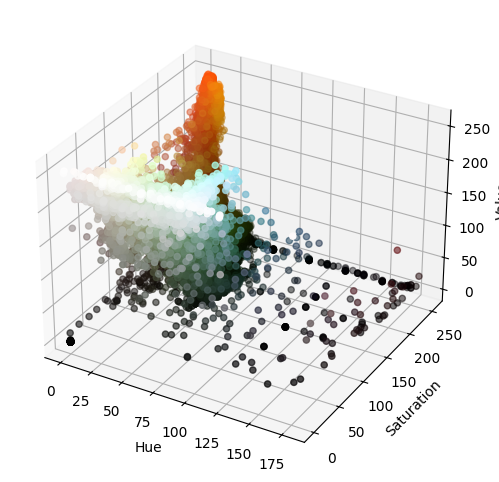

In [65]:
pixels_list_hsv = nemo_hsv.reshape(-1,3)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection= '3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb/ 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

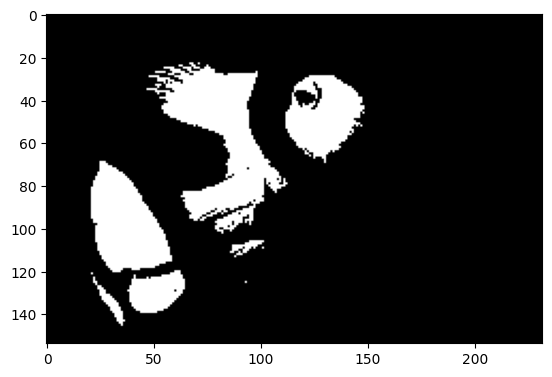

In [66]:
light_orange = (1,190, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.show()

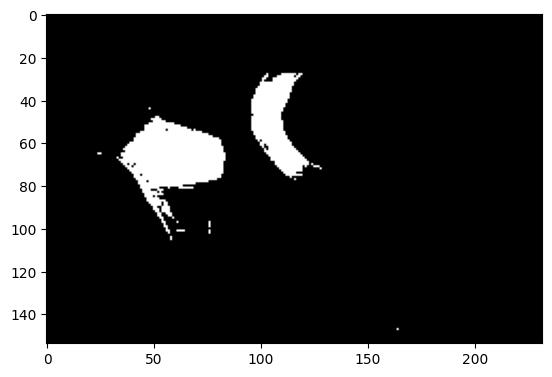

In [67]:
light_white= (0,0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.show()

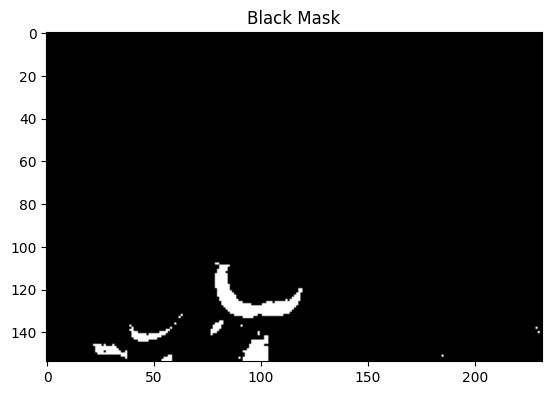

In [68]:
light_black = (0, 0, 0)  
dark_black = (185, 255, 8)   

mask_black = cv2.inRange(nemo_hsv, light_black, dark_black)

plt.imshow(mask_black, cmap='gray')
plt.title('Black Mask')
plt.show()

In [69]:
final_mask = mask_orange + mask_white + mask_black


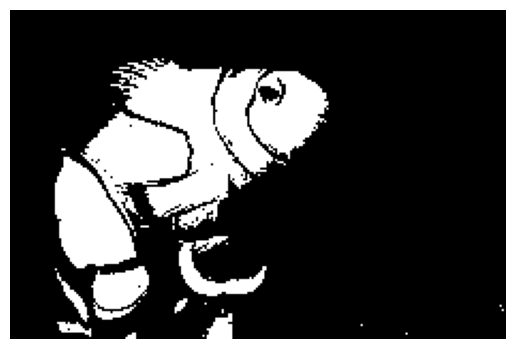

In [70]:
plt.axis('off')
plt.imshow(final_mask, cmap='gray')
plt.show()

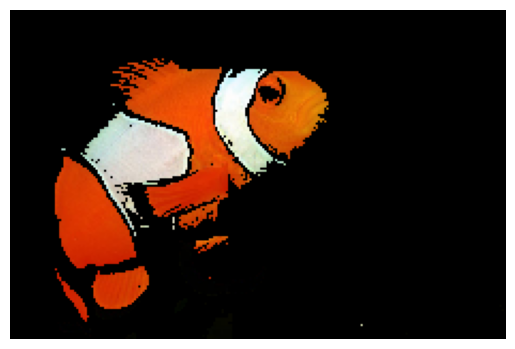

In [71]:
final_result= cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.axis('off')
plt.imshow(final_result)
plt.show()

In [72]:
X_train = pixels_list_hsv / 255
Y_train = final_mask.reshape(-1,) // 255

In [73]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [74]:
new_pixel = np.array([10, 200, 255]) / 255
knn.predict([new_pixel])

array([1], dtype=int64)

In [51]:
dashe_nemo = cv2.imread('dashe-nemo.jpg')
dashe_nemo = cv2.resize(dashe_nemo,(0,0), fx=0.25, fy=0.25)
dashe_nemo_rgb = cv2.cvtColor(dashe_nemo, cv2.COLOR_BGR2RGB)
dashe_nemo_hsv = cv2.cvtColor(dashe_nemo_rgb, cv2.COLOR_RGB2HSV)

In [52]:
from joblib import Parallel, delayed

X_test = dashe_nemo_hsv.reshape(-1,3) / 255

def parallel_predict(knn_model, pixel):
    return knn_model.predict([pixel])

Y_pred = Parallel(n_jobs=-1)(delayed(parallel_predict)(knn, pixel) for pixel in X_test)
Y_pred = np.array(Y_pred)


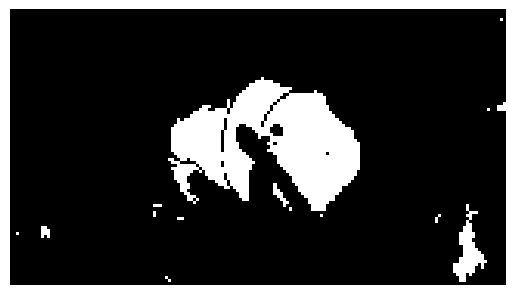

In [53]:
out_put = Y_pred.reshape(dashe_nemo.shape[:2])
plt.axis('off')
plt.imshow(out_put, cmap= 'gray')
plt.show()

In [54]:
out_put = out_put.astype('uint8')

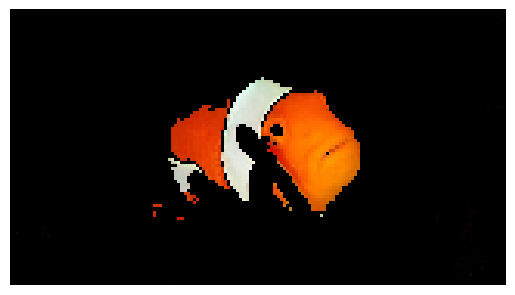

In [55]:
final_result_1 = cv2.bitwise_and(dashe_nemo_rgb, dashe_nemo_rgb, mask=out_put)
plt.axis('off')
plt.imshow(final_result_1)
plt.show()

In [75]:
abji_nemo = cv2.imread('abjie-nemo.jpg')
abji_nemo = cv2.resize(abji_nemo,(0,0), fx=0.1, fy=0.1)
abji_nemo_rgb = cv2.cvtColor(abji_nemo, cv2.COLOR_BGR2RGB)
abji_nemo_hsv = cv2.cvtColor(abji_nemo_rgb, cv2.COLOR_RGB2HSV)

In [76]:
from joblib import Parallel, delayed

X_test = abji_nemo_hsv .reshape(-1,3) / 255

def parallel_predict(knn_model, pixel):
    return knn_model.predict([pixel])

Y_pred = Parallel(n_jobs=-1)(delayed(parallel_predict)(knn, pixel) for pixel in X_test)
Y_pred = np.array(Y_pred)


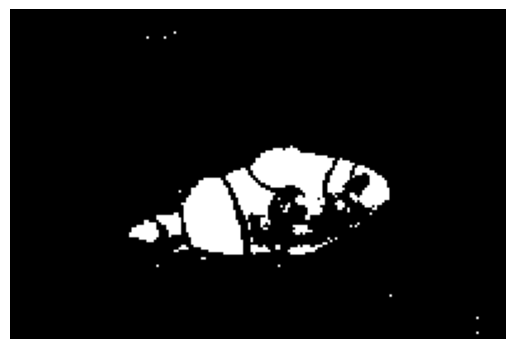

In [77]:
out_put = Y_pred.reshape(abji_nemo.shape[:2])
plt.axis('off')
plt.imshow(out_put, cmap= 'gray')
plt.show()

In [78]:
out_put = out_put.astype('uint8')

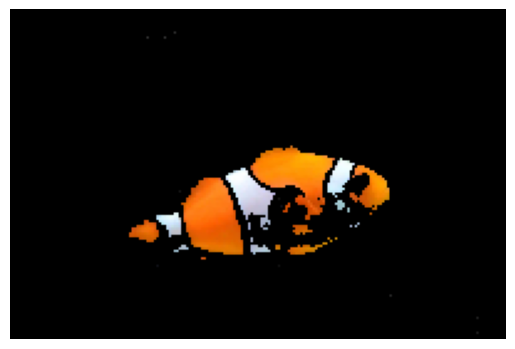

In [79]:
final_result_2 = cv2.bitwise_and(abji_nemo_rgb, abji_nemo_rgb, mask=out_put)
plt.axis('off')
plt.imshow(final_result_2)
plt.show()